# Run the whole deltas algorithm

In [35]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import pipeline
import model_deltas
import plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [36]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

clf


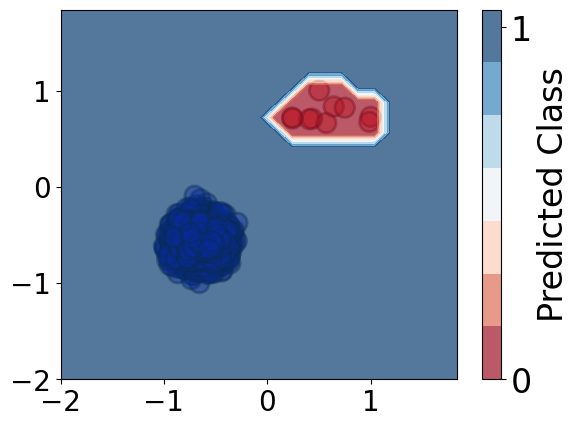

SMOTE


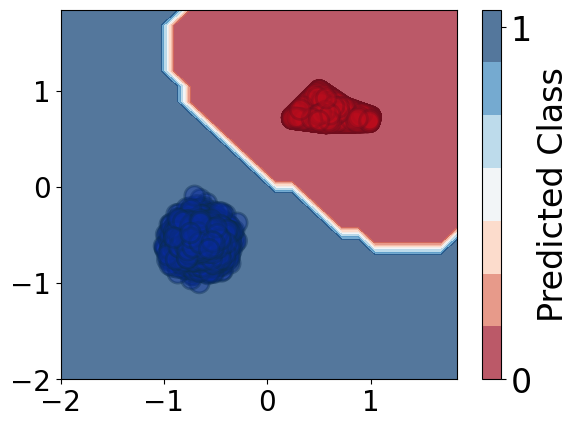

In [37]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [38]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.08625239]])

## Fit deltas

deltas init: [1, 0.05402746416061881]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.001001001001002 
    delta2: 0.07127370599888859
    constraint satisfied: False


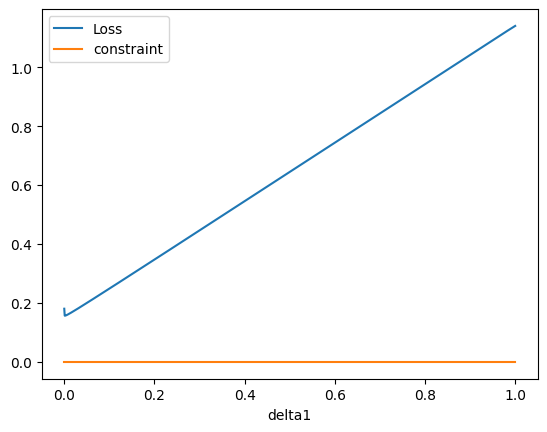

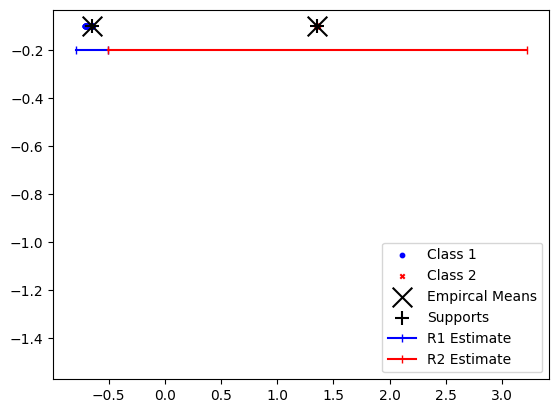

In [39]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

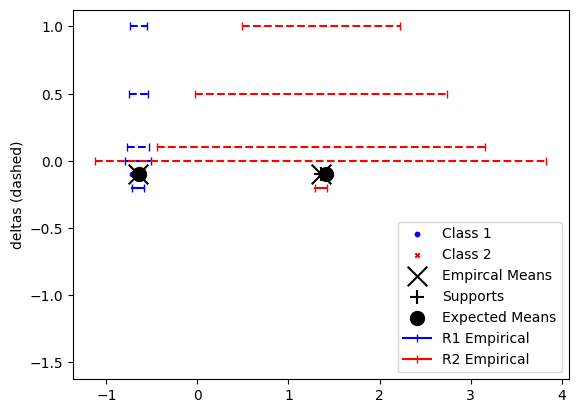

In [40]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## See how classifier's boudnary changes with delta

In [41]:
@ipywidgets.interact_manual(
    delta_class0=(0.00001, 1., 0.00001),
)
def plot(delta_class0=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta1(X, delta_class0)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta_class0}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta_class0', max=1.0, min=1e-05, step=1e-05), Butt…

## Show parameters

In [42]:
deltas_model.print_params()

Parameters
                R:  1.3645140799119033
                N1: 10000
                N2: 10
                R1: 0.06373297175989212
                R2: 0.008353801670541339
                M:  1.9991550562578975
                D:  2.0048214914837916
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9447
deltas accuracy: 0.99995
SMOTE accuracy: 1.0

original F1: 0.9414628982745845
deltas F1: 0.999950002499875
SMOTE F1: 1.0

original precision0: 0.9004141905276427
deltas precision0: 1.0
SMOTE precision0: 1.0

original precision1: 1.0
deltas precision1: 0.9999000099990001
SMOTE precision1: 1.0



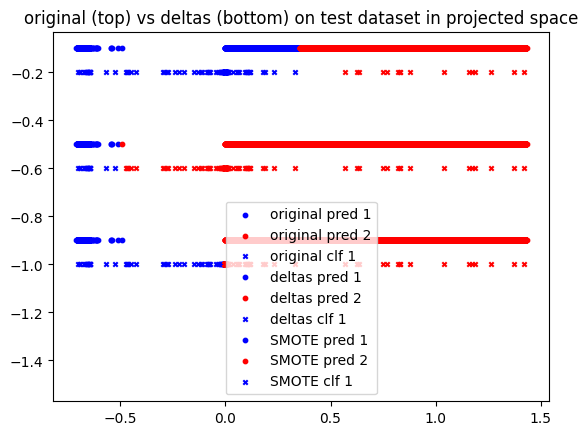

original


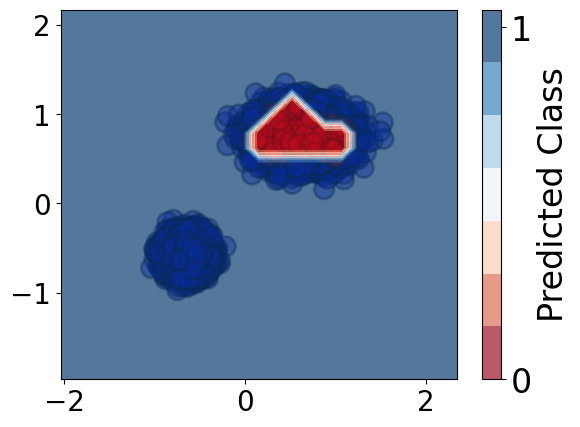

deltas


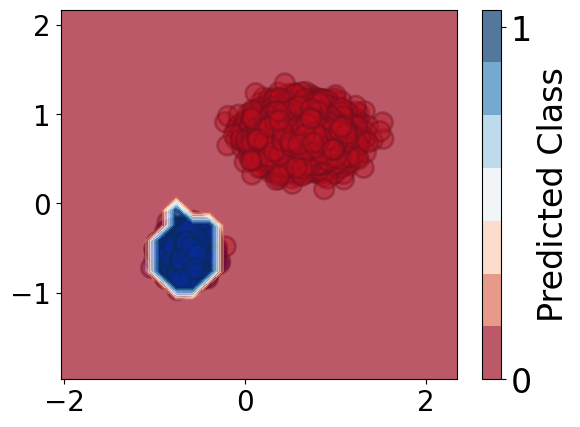

SMOTE


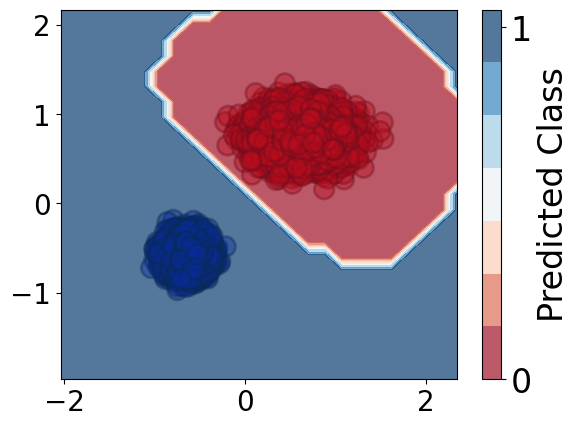

In [43]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
pipeline.eval_test_new(mdels,
                       data_clf['data_test'], _print=True, _plot=True)